<a href="https://colab.research.google.com/github/beginnoob/BrainTumorTrain/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path folder asli
dataset_path = "/content/drive/MyDrive/Dataset/BrainTumor"  # Ubah dengan path dataset Anda

# Path folder output
train_path = "/content/drive/MyDrive/Dataset/BrainTumor/train"
test_path = "/content/drive/MyDrive/Dataset/BrainTumor/test"


# # Membuat folder train dan test
# os.makedirs(train_path, exist_ok=True)
# os.makedirs(test_path, exist_ok=True)

# # Loop untuk setiap label
# for label in ['Brain Tumor', 'Healthy']:
#     images = os.listdir(os.path.join(dataset_path, label))
#     train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

#     # Memindahkan file ke folder train
#     os.makedirs(os.path.join(train_path, label), exist_ok=True)
#     for img in train_images:
#         shutil.move(os.path.join(dataset_path, label, img), os.path.join(train_path, label, img))

#     # Memindahkan file ke folder test
#     os.makedirs(os.path.join(test_path, label), exist_ok=True)
#     for img in test_images:
#         shutil.move(os.path.join(dataset_path, label, img), os.path.join(test_path, label, img))


In [ ]:
# Normalisasi dan Augmentasi Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalisasi pixel 0-1
    rotation_range=20,        # Rotasi max 20 derajat
    width_shift_range=0.2,    # Geser horizontal
    height_shift_range=0.2,   # Geser vertikal
    zoom_range=0.2,           # Zoom in-out
    horizontal_flip=True,     # Flip horizontal
    validation_split=0.2,     # 20% data untuk validasi
    fill_mode='nearest'

)

# Load dataset dengan ImageDataGenerator
train_data = datagen.flow_from_directory(
    train_path,  # Folder training
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary',  # Karena hanya ada 2 kelas
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 2055 images belonging to 2 classes.
Found 513 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),  # Mengurangi overfitting
    Dense(1, activation='sigmoid')  # 1 output untuk binary classification
])


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 420s 13s/step - accuracy: 0.5668 - loss: 2.0344 - val_accuracy: 0.5984 - val_loss: 0.8409
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 386s 11s/step - accuracy: 0.5985 - loss: 0.7881 - val_accuracy: 0.6062 - val_loss: 0.6918
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 372s 11s/step - accuracy: 0.5911 - loss: 0.6752 - val_accuracy: 0.6062 - val_loss: 0.6824
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 390s 11s/step - accuracy: 0.6056 - loss: 0.6405 - val_accuracy: 0.4600 - val_loss: 0.7554
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 373s 11s/step - accuracy: 0.6102 - loss: 0.6571 - val_accuracy: 0.5789 - val_loss: 0.6850
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 358s 11s/step - accuracy: 0.6869 - loss: 0.6226 - val_accuracy: 0.6647 - val_loss: 0.7251
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 359s 11s/step - accuracy: 0.6471 - loss: 0.6704 - val_accuracy: 0.6160 - val_loss: 0.8288
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 363s 10s/step - accuracy: 0.6108 - loss: 0.7280 - val_accuracy: 0.

In [ ]:
# Evaluasi di data test
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Akurasi Model: {val_accuracy*100:.2f}%")

17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6052 - loss: 0.7605
Akurasi Model: 61.60%


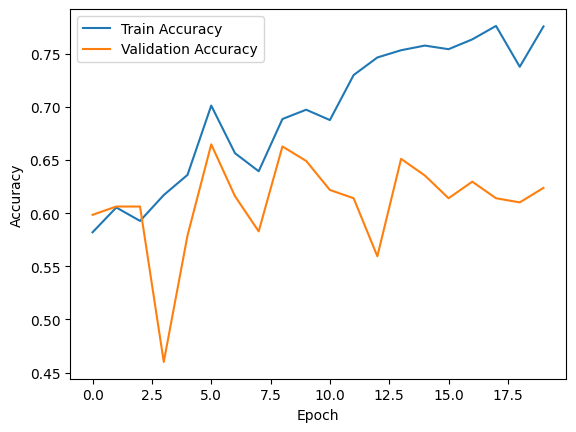

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


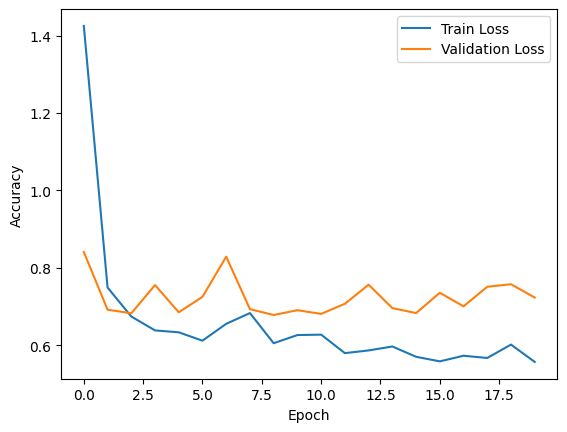

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/Dataset/BrainTumor/test/Brain Tumor/Cancer (1374).jpg'
img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediksi: Tumor Cancer")
else:
    print("Prediksi: Tidak Cancer")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediksi: Tidak Cancer
